## People in group :

1.   Kaja Gnana Prakash - 224101027
2.   Vudatha Venkata Narendra - 224101060
3.   Maddala Karthik - 224101029
4.   Tejas Chandra Karreddula - 224101052
5.   Ashish Kumar Pal - 224101009







### **Assignment Moto**
To detect the edges in the fundus image using morphological operations.

## **Solution 1**
## Image Processing Steps : 


1.   Extract the green channel from the given RBG image
2.   Applying histogram equalization on the extarcted image
3.   Perform erosion on the extarcted image
4.   Perform opening operation on the image obtained
5.   Do gaussian blurring on the obtained image
6.   Apply sobel operator for the obtained image
7.   Erode and dilate the image

## **Solution 2**
## Image Processing Steps : 

1.   Extract the green channel from the given RBG image
2.   Applying histogram equalization on the extarcted image
3.   Adding gaussian noise to the obtained image
4.   Do canny edge detection for the image obtained
5.   Apply dilation to the obtained
6.   Apply erosion to the obtained

# **Start of solution 1**


**IMPORT PACKAGES**

In [23]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

**READ IMAGE**

In [24]:

I = cv2.imread("fundus.jpeg",cv2.IMREAD_UNCHANGED)
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
#print(I.shape)
#plt.plot()

**EXTRACTING GREEN CHANNEL**

In [25]:
green_channel = I[:,:,1]
# plt.imshow(green_channel)
# plt.plot()

**APPLYING HISTOGRAM EQUALISATION**

[]

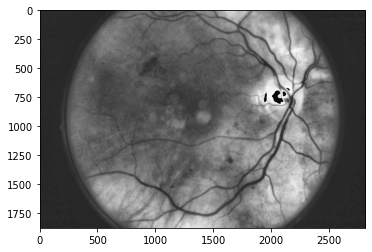

In [26]:
clahe = cv2.createCLAHE(clipLimit = 5)
final_img = clahe.apply(green_channel) + 30
final_img=cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
plt.imshow(final_img)
plt.plot()

**PERFORMING EROSION**

[]

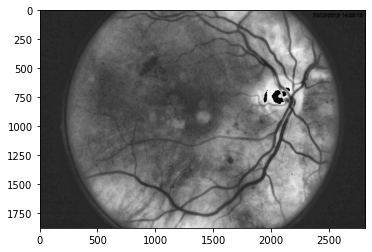

In [27]:
kernel = np.ones((5, 5), np.uint8)
img_erosion = cv2.erode(final_img, kernel, iterations=1)
img_erosion=cv2.cvtColor(img_erosion, cv2.COLOR_BGR2RGB)
plt.imshow(img_erosion)
plt.plot()

**OPENING OPERATION**

[]

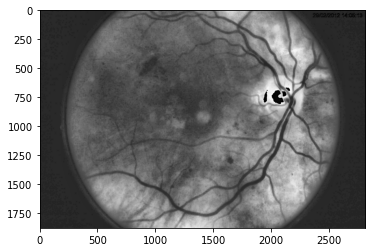

In [28]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(img_erosion, cv2.MORPH_OPEN, kernel, iterations=1)
opening=cv2.cvtColor(opening, cv2.COLOR_BGR2RGB)
plt.imshow(opening)
plt.plot()

**DO GAUSSIAN BLUR**

[]

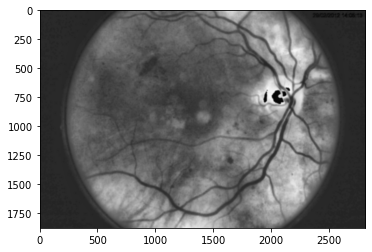

In [29]:
img_blur = cv2.GaussianBlur(opening, (21,21), 0) 
plt.imshow(img_blur)
plt.plot() 

**DO SOBEL EDGE DETECTION**

Text(0.5, 1.0, 'OUTPUT Image')

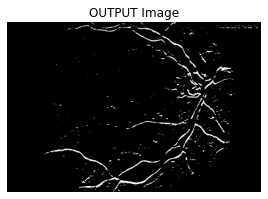

In [30]:
sobelx = cv2.Sobel(img_blur,cv2.CV_64F,1,0,ksize=3)
thresh, bin1 = cv2.threshold(sobelx, 15, 70, cv2.THRESH_BINARY)  
image = cv2.resize(bin1, (1880,2816))
sobely = cv2.Sobel(img_blur,cv2.CV_64F,0,1,ksize=3)
thresh, bin2 = cv2.threshold(sobely, 15, 70, cv2.THRESH_BINARY)
#Dilating the image
img_dilation2 = cv2.dilate(bin2, np.ones((3, 3), np.uint8), iterations=1)
fig = plt.figure(figsize=(10, 7))   
rows = 2
columns = 2
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(bin2)
plt.axis('off')
plt.title("OUTPUT Image")

# **Solution 2**

**IMPORTING imshow**

In [31]:
from google.colab.patches import cv2_imshow

**IMPORT** **PACKAGES**

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**READING THE IMAGE**

In [33]:
img = cv2.imread("fundus.jpeg")

**EXTRACTING THE GREEN CHANNEL**

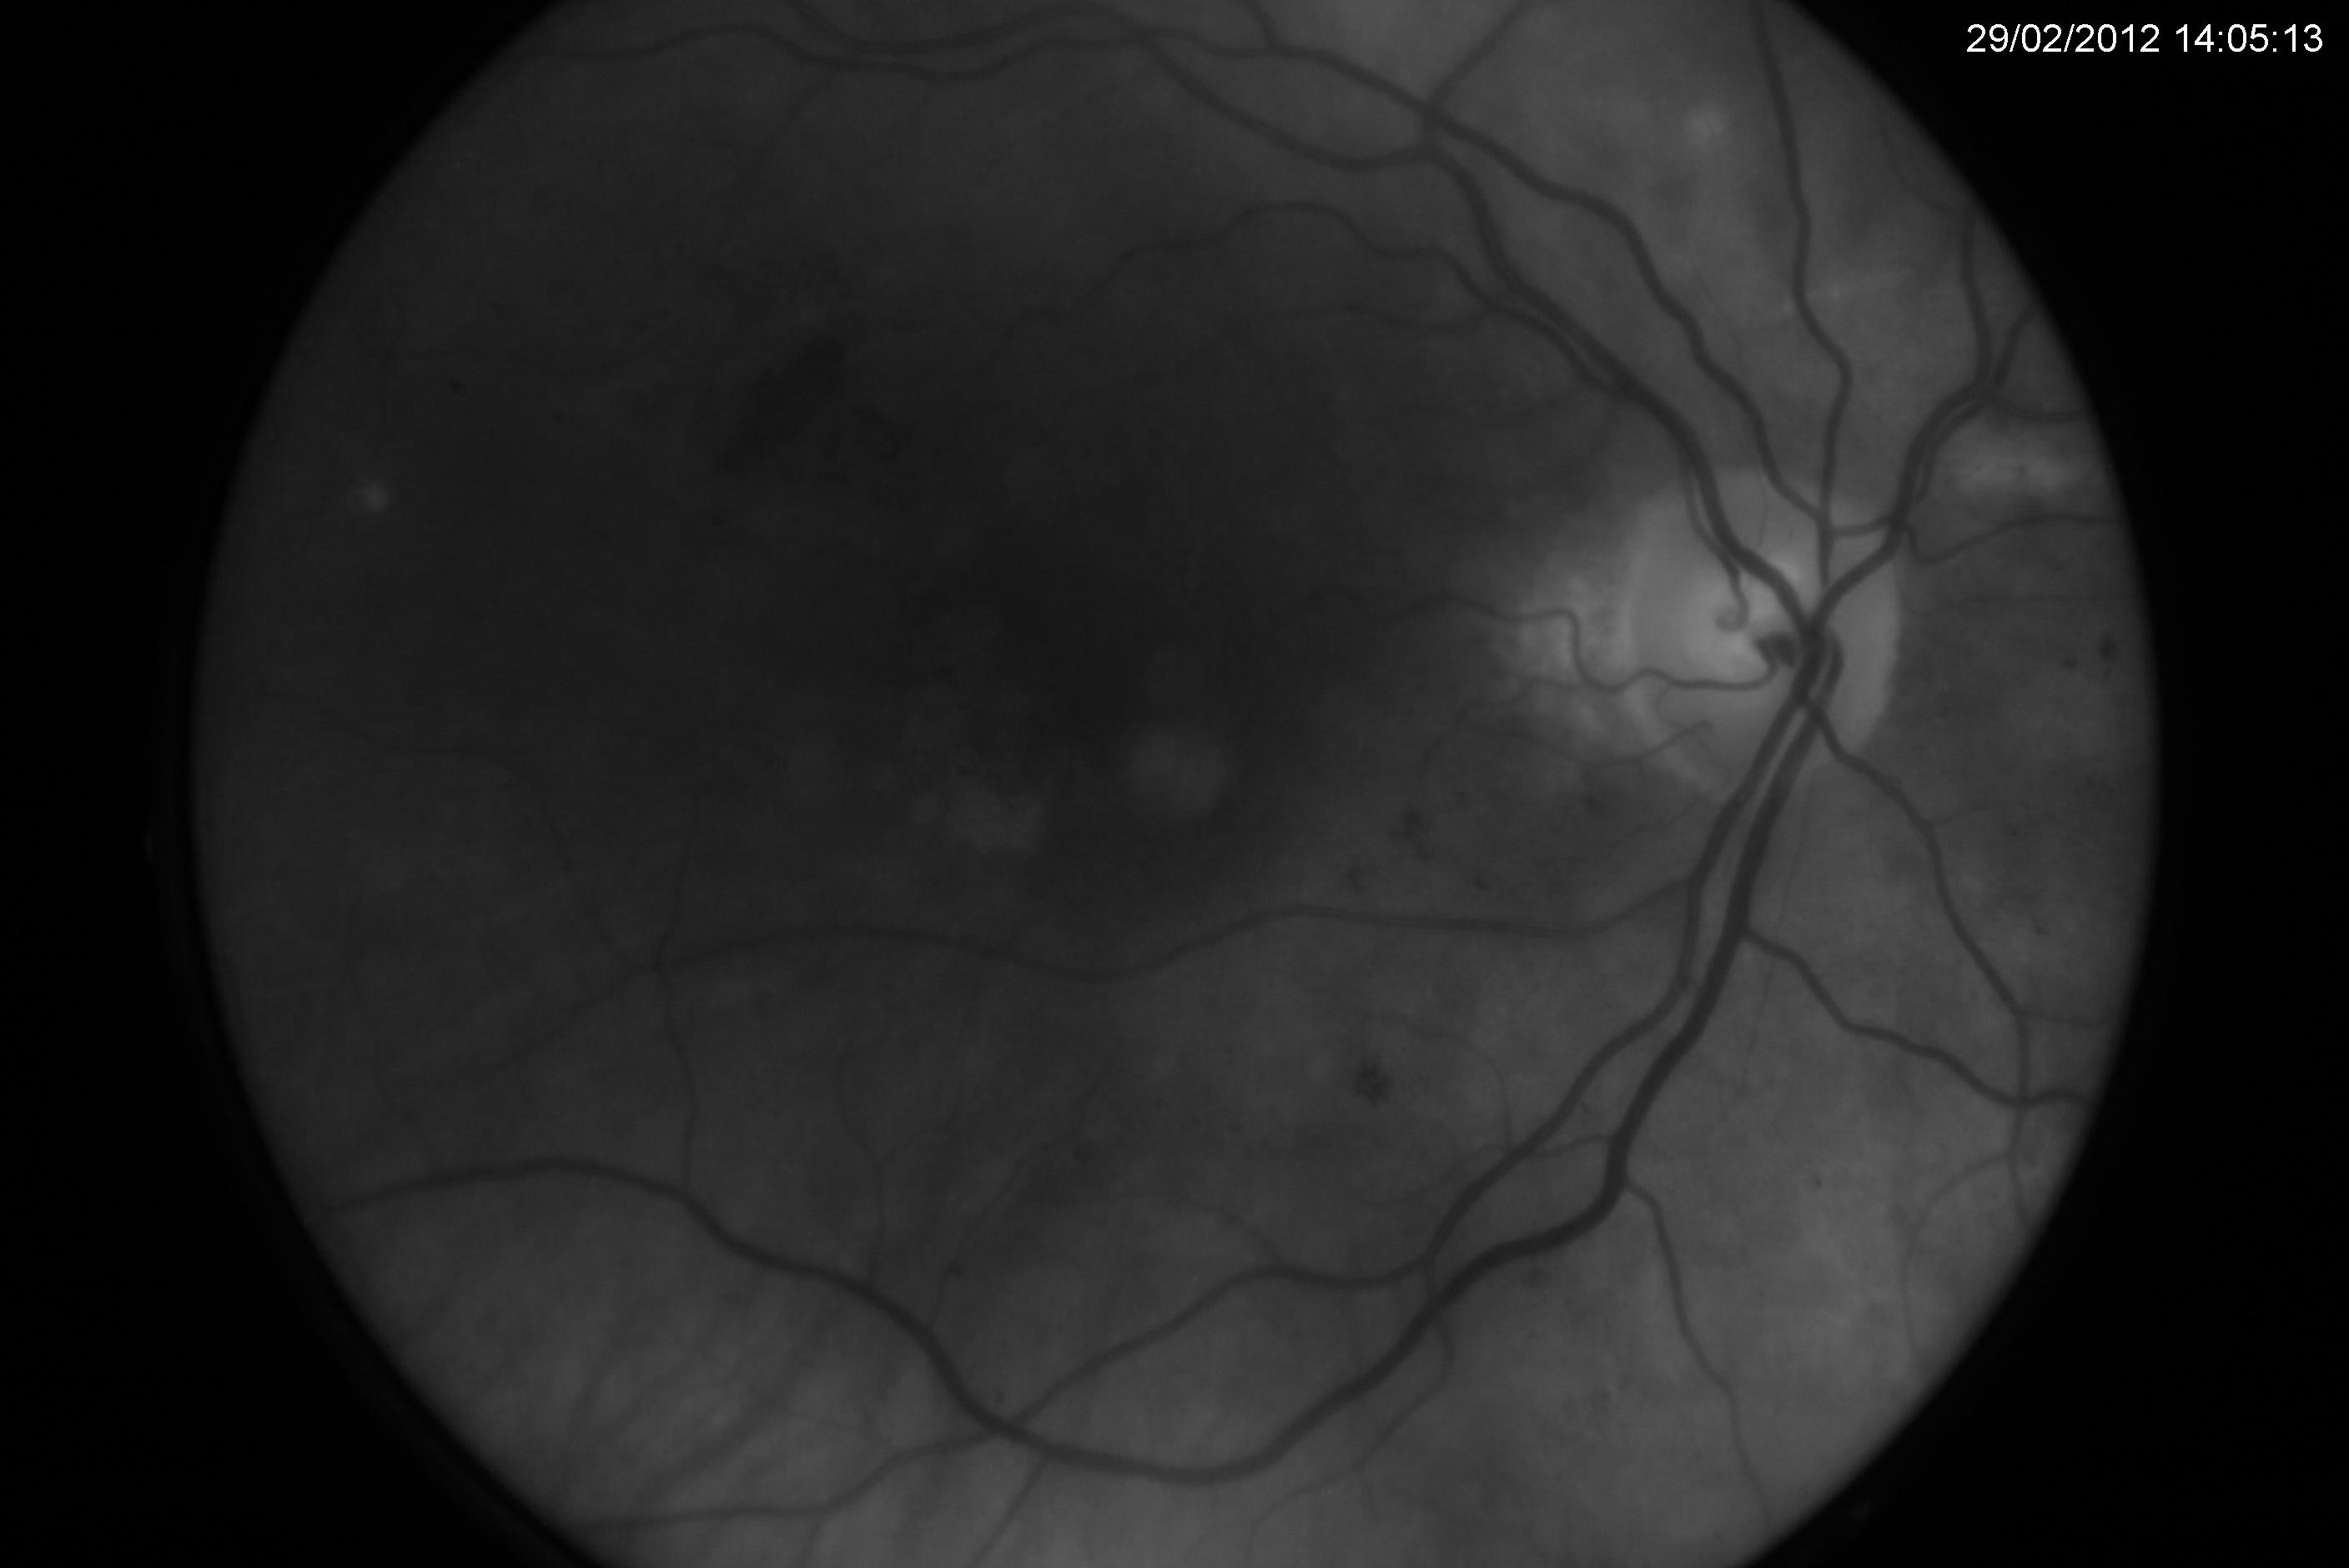

In [34]:
green_channel = img[:,:,1]
cv2_imshow(green_channel)

**HISTOGRAM EQUALISING**

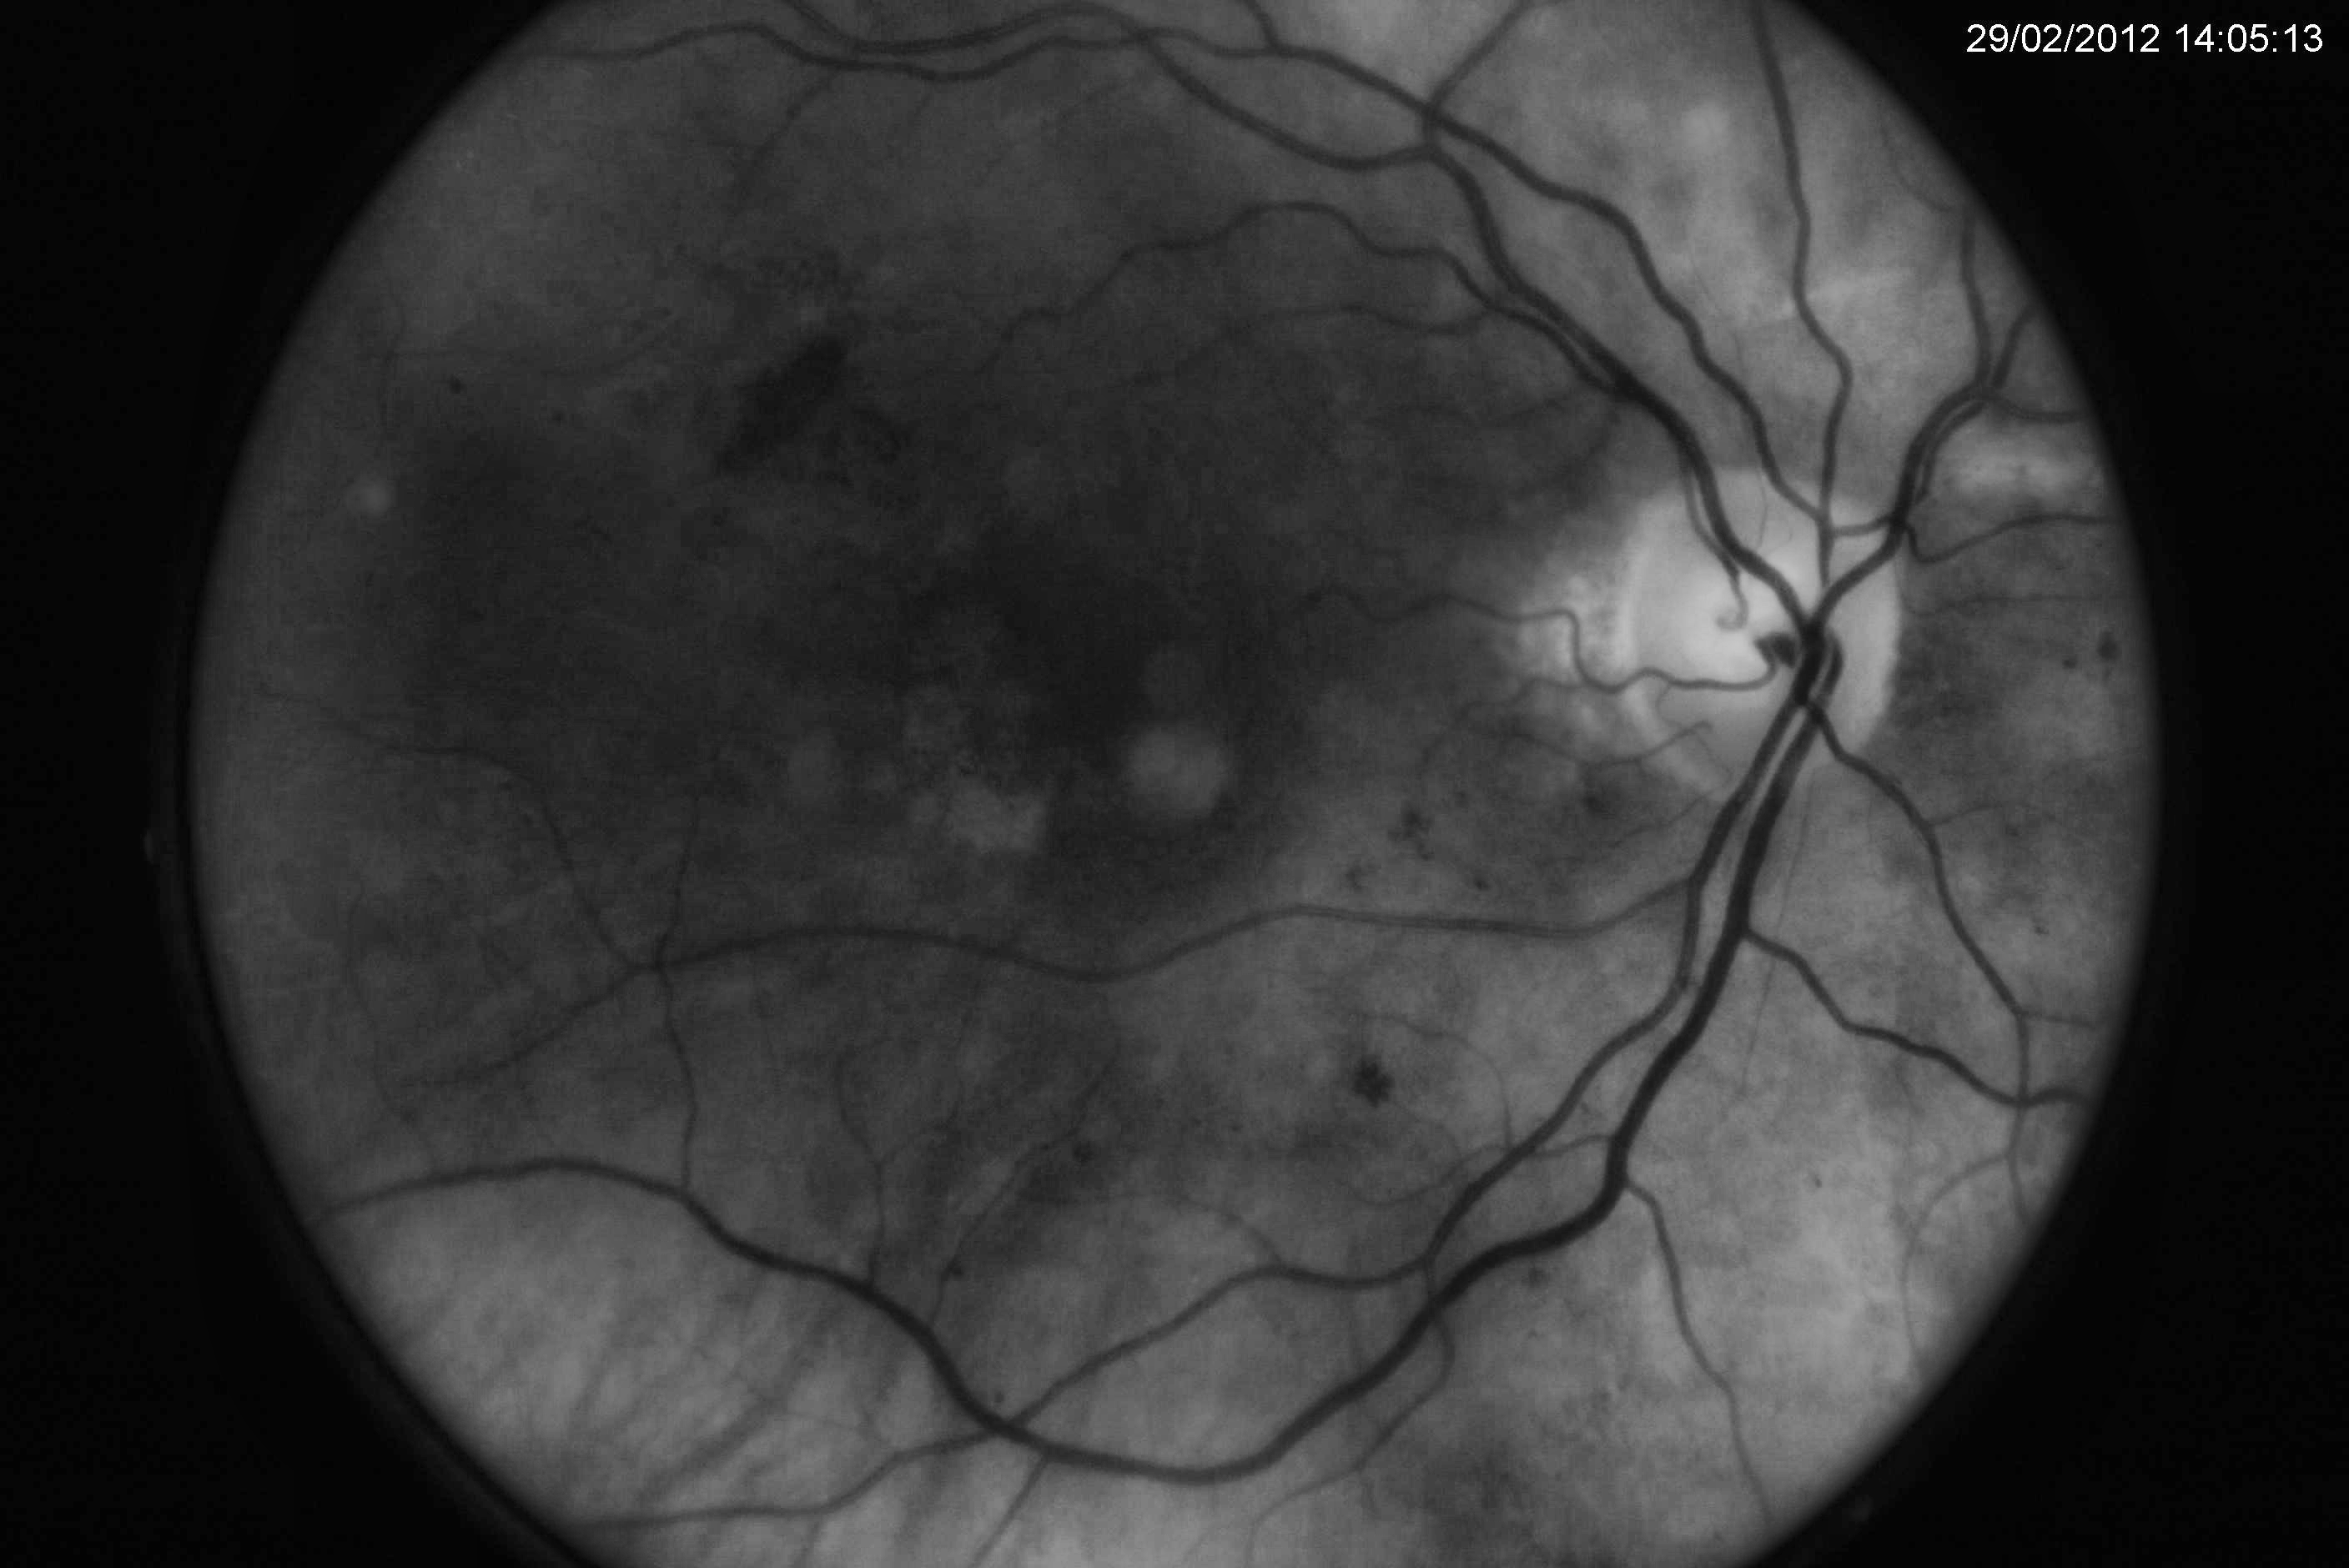

In [35]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equalized = clahe.apply(green_channel)
cv2_imshow(equalized)

**ADDING GAUSSIAN NOISE**

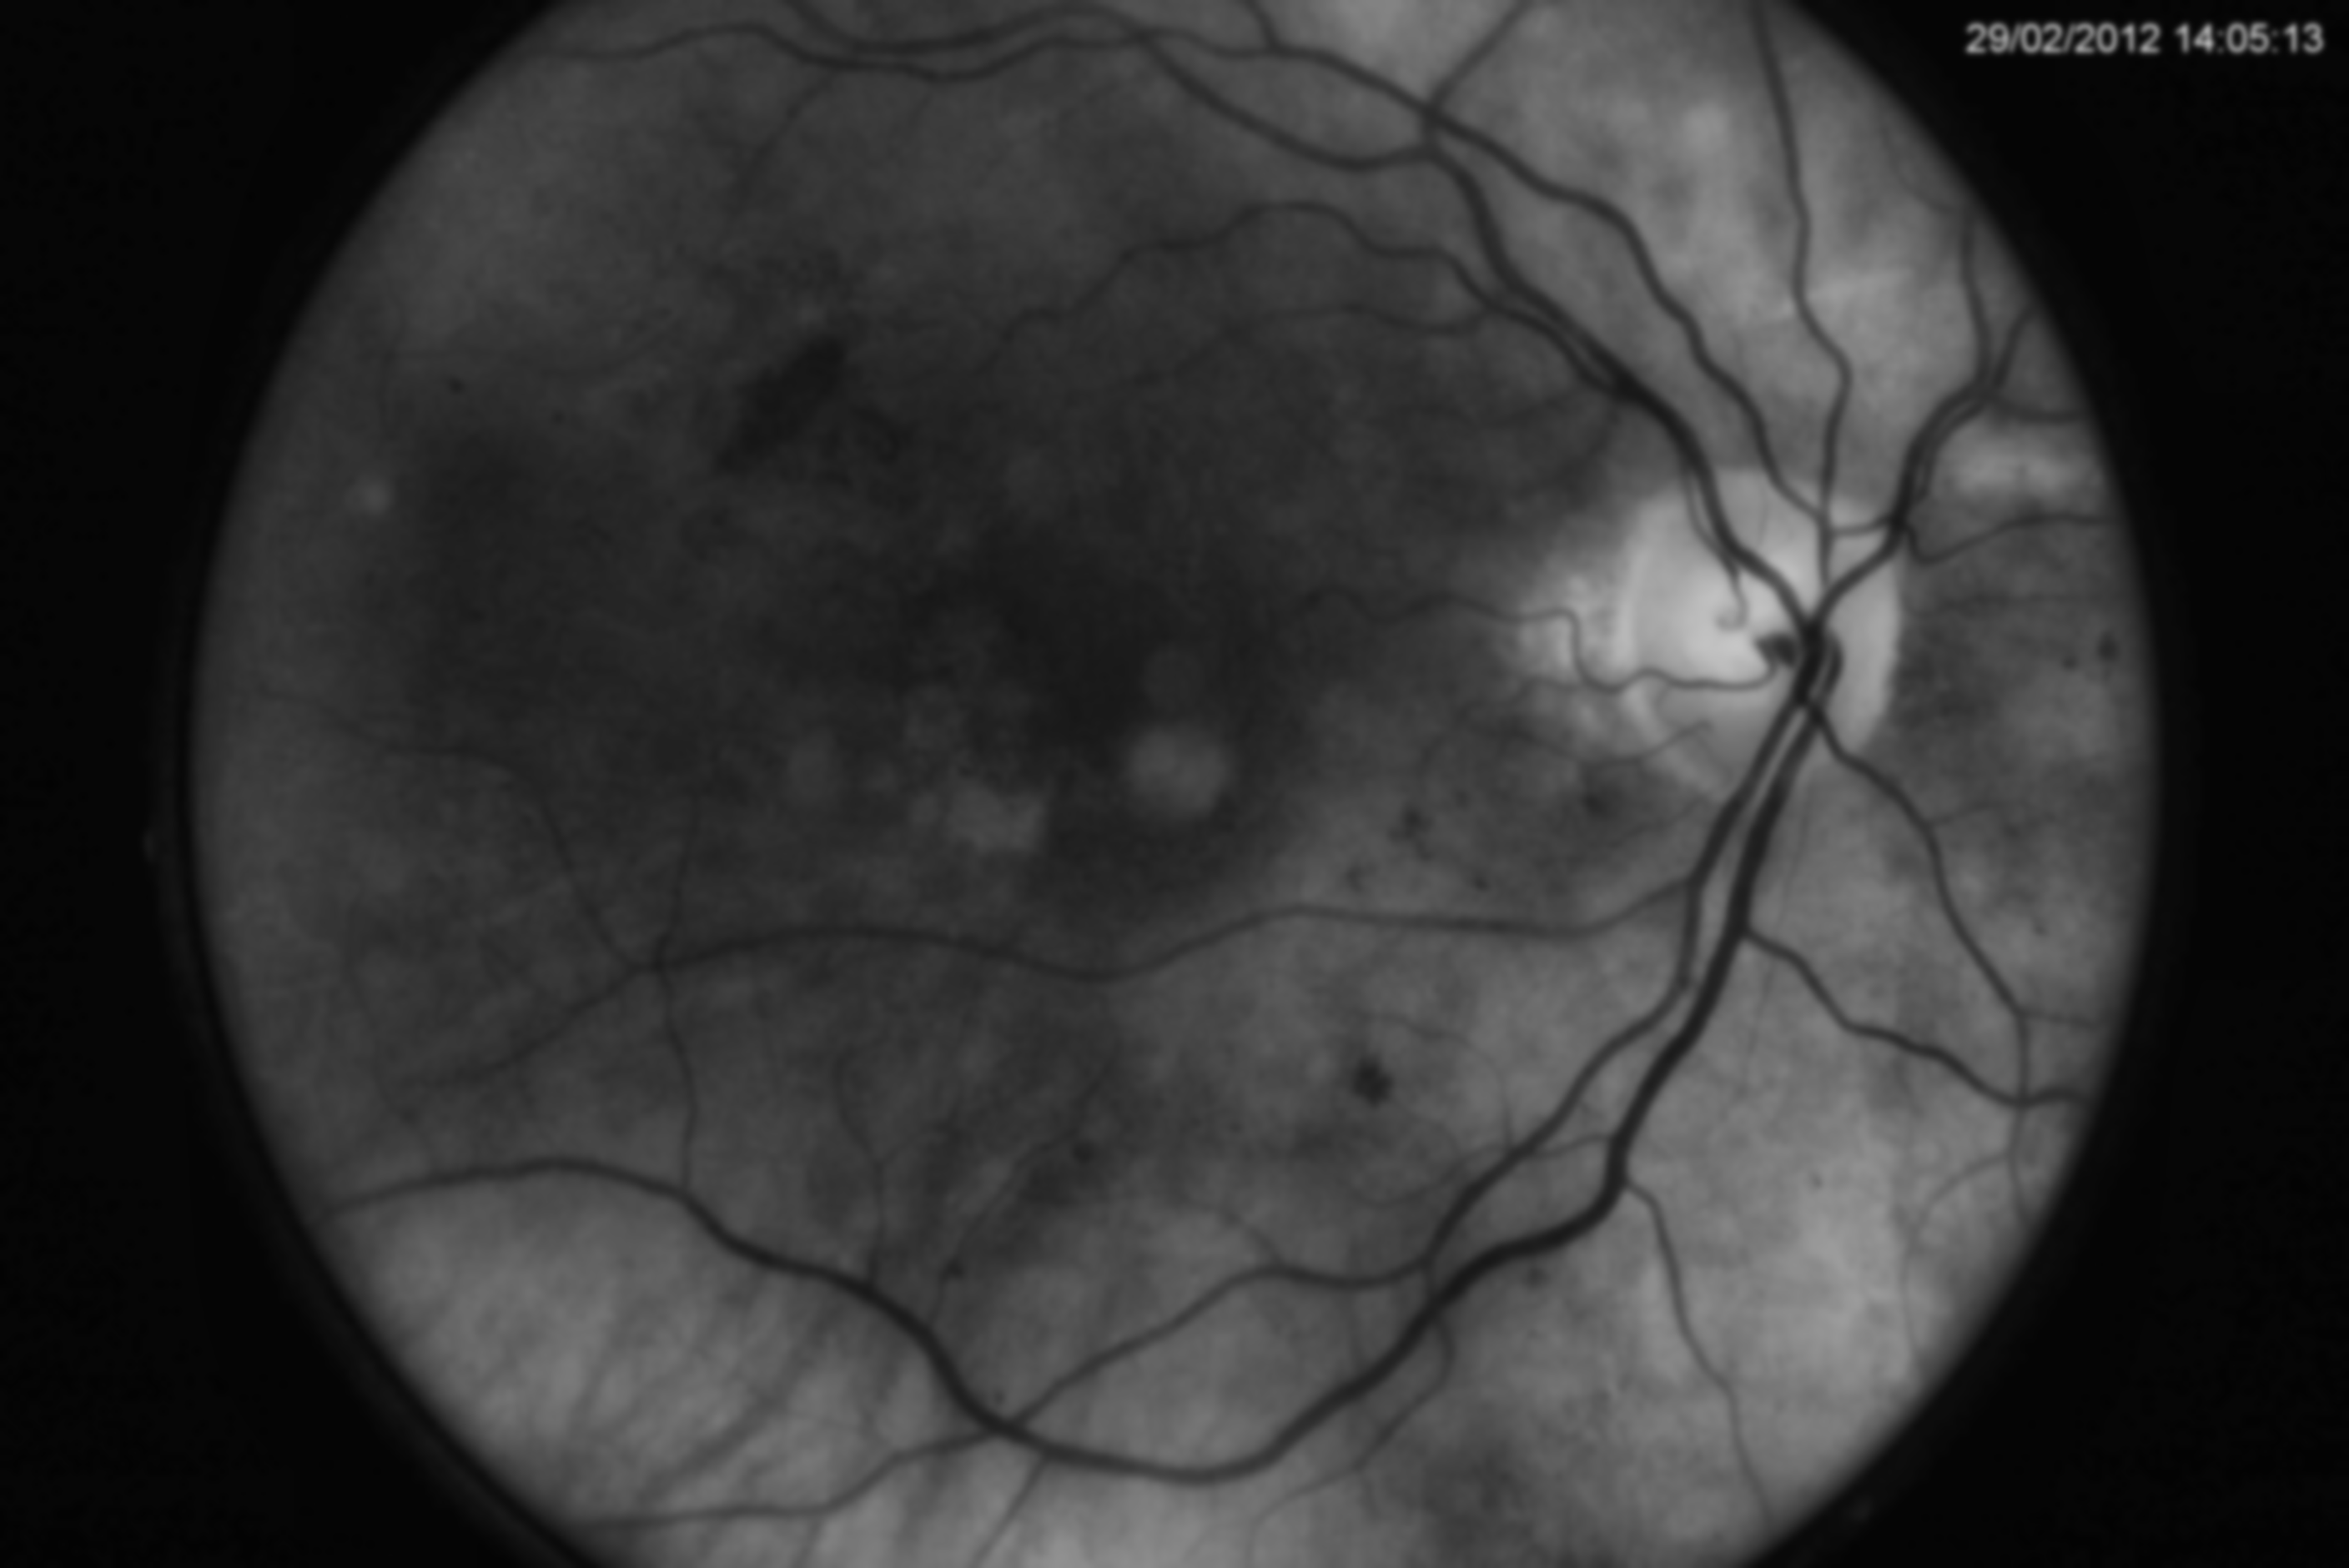

In [36]:
gauss = cv2.GaussianBlur(equalized, (21,21), 0)
cv2_imshow(gauss)

**APPLYING CANNY EDGE DETECTION**

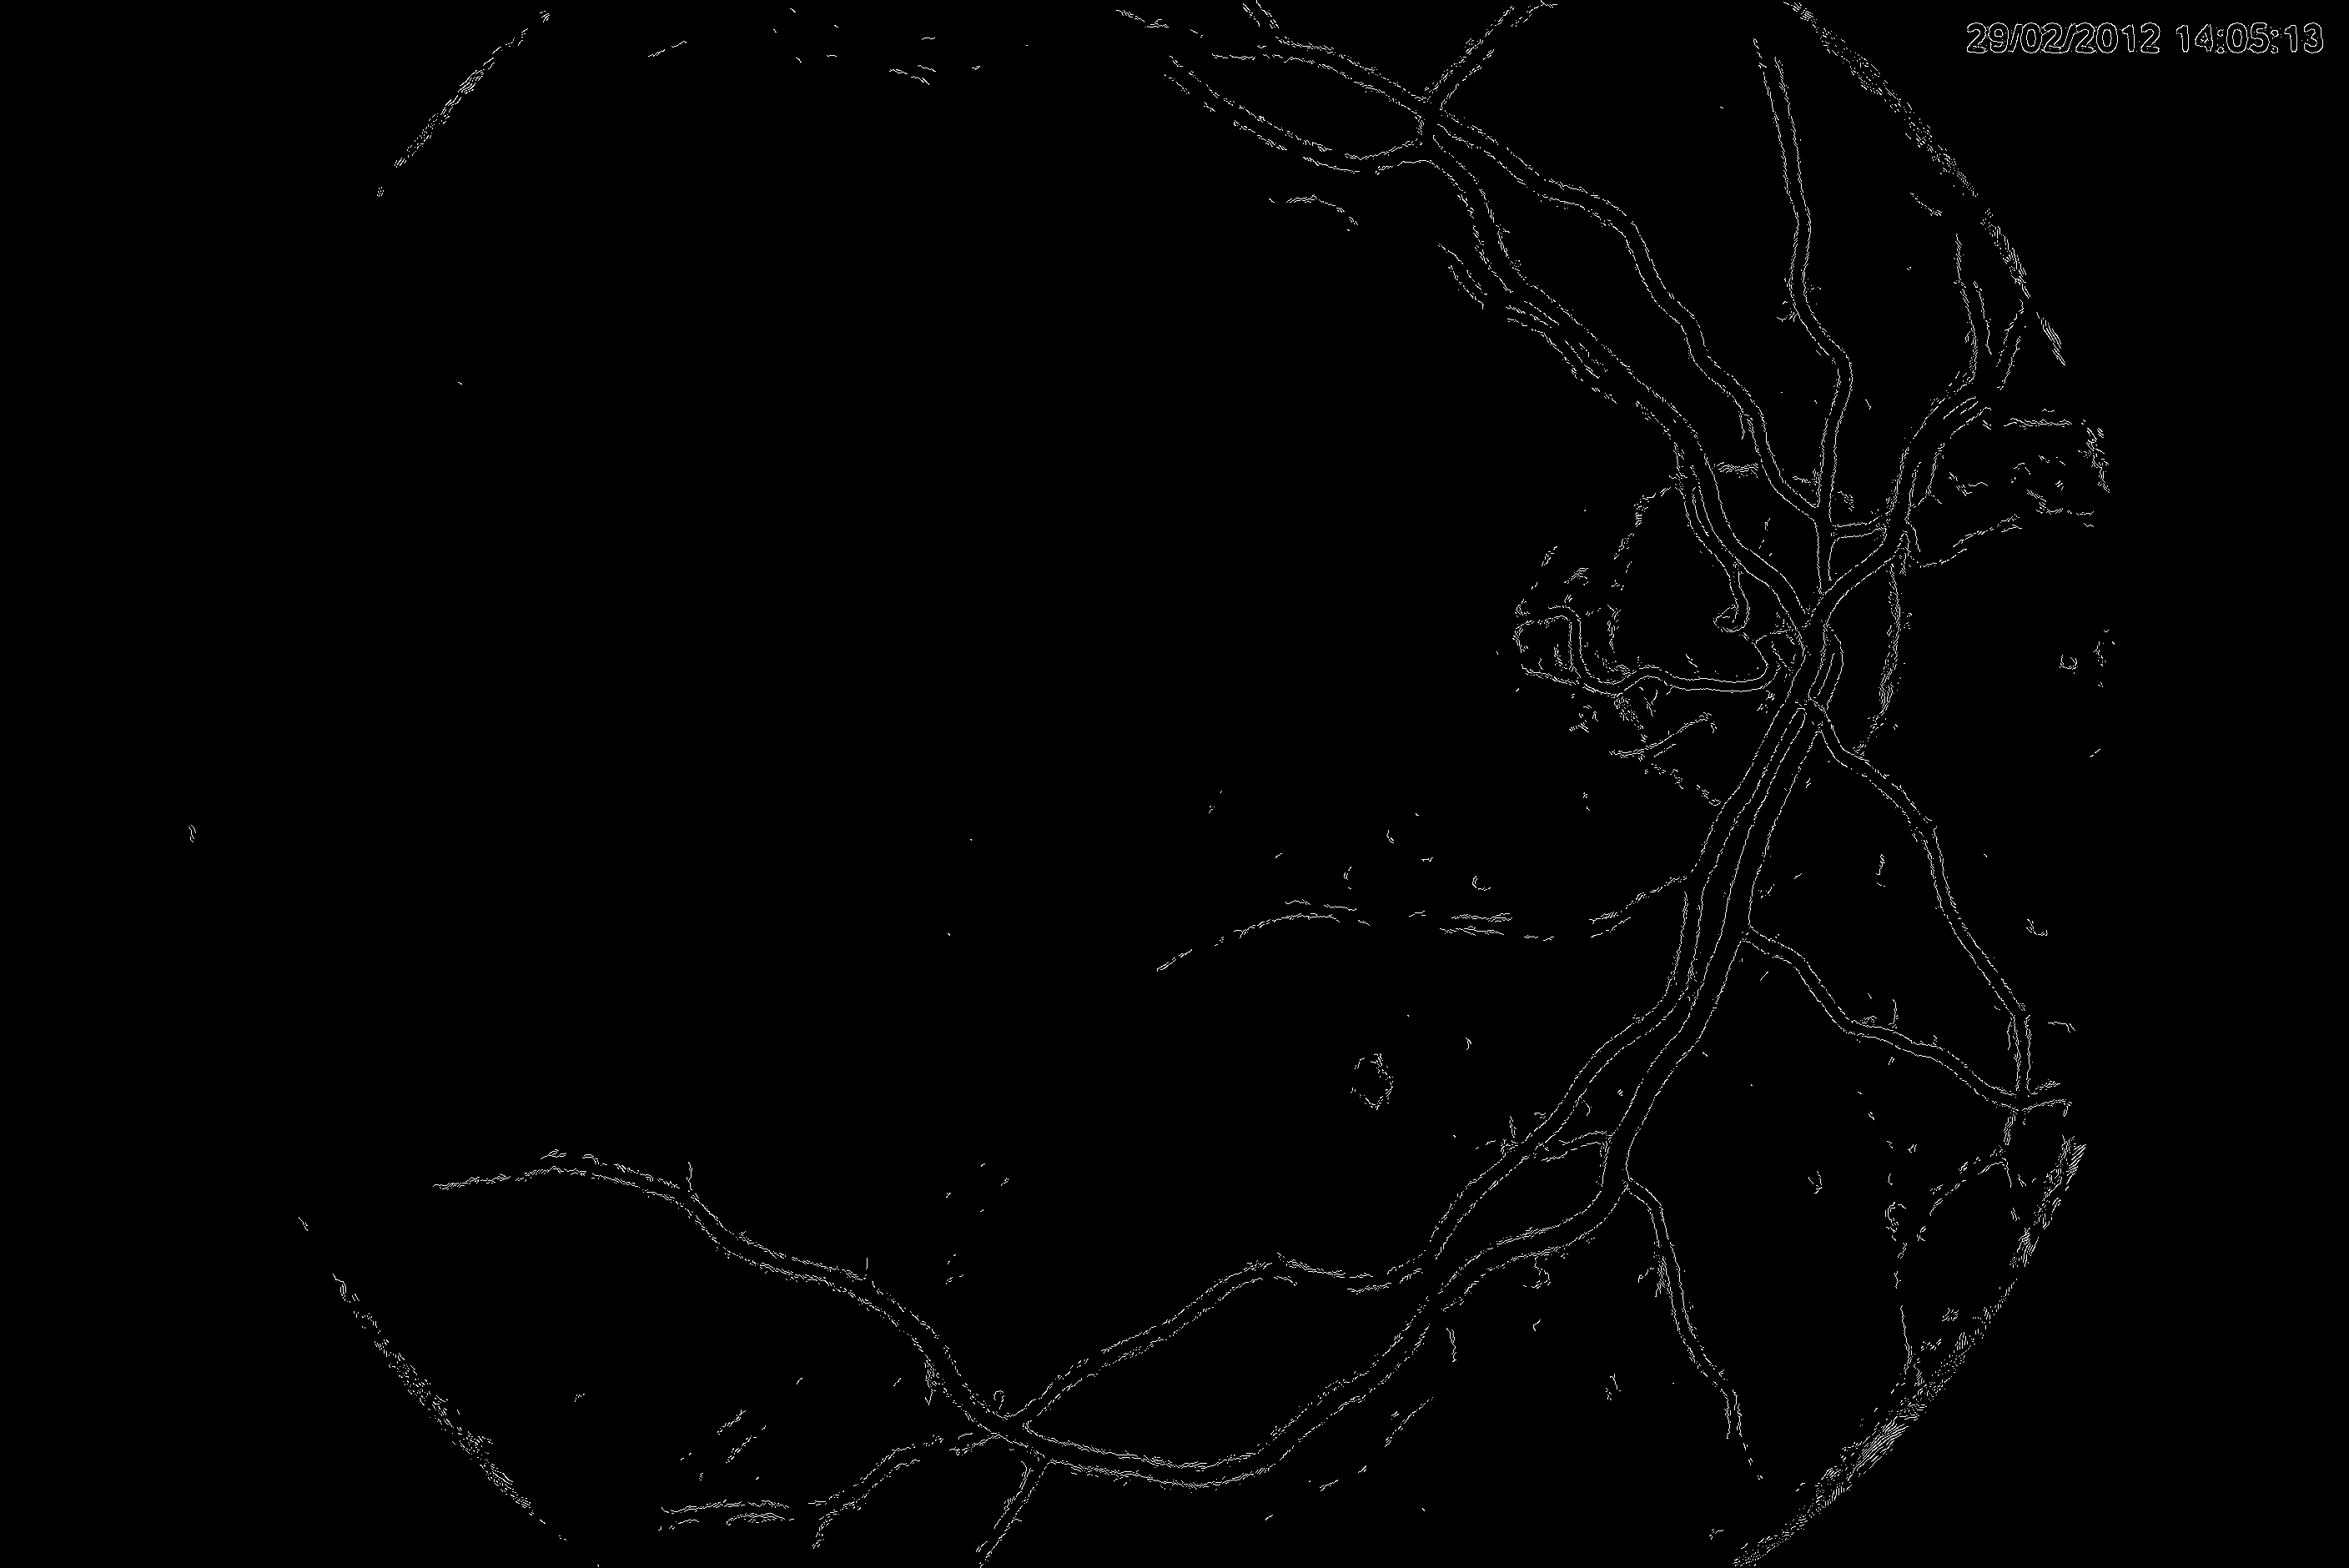

In [37]:
lwr = 5 # Lower Threshold
upr = 20  # Upper threshold
edge = cv2.Canny(gauss, lwr, upr)
cv2.imwrite("edges.jpg", edge)
cv2_imshow(edge)

**APPLYING DILATION**

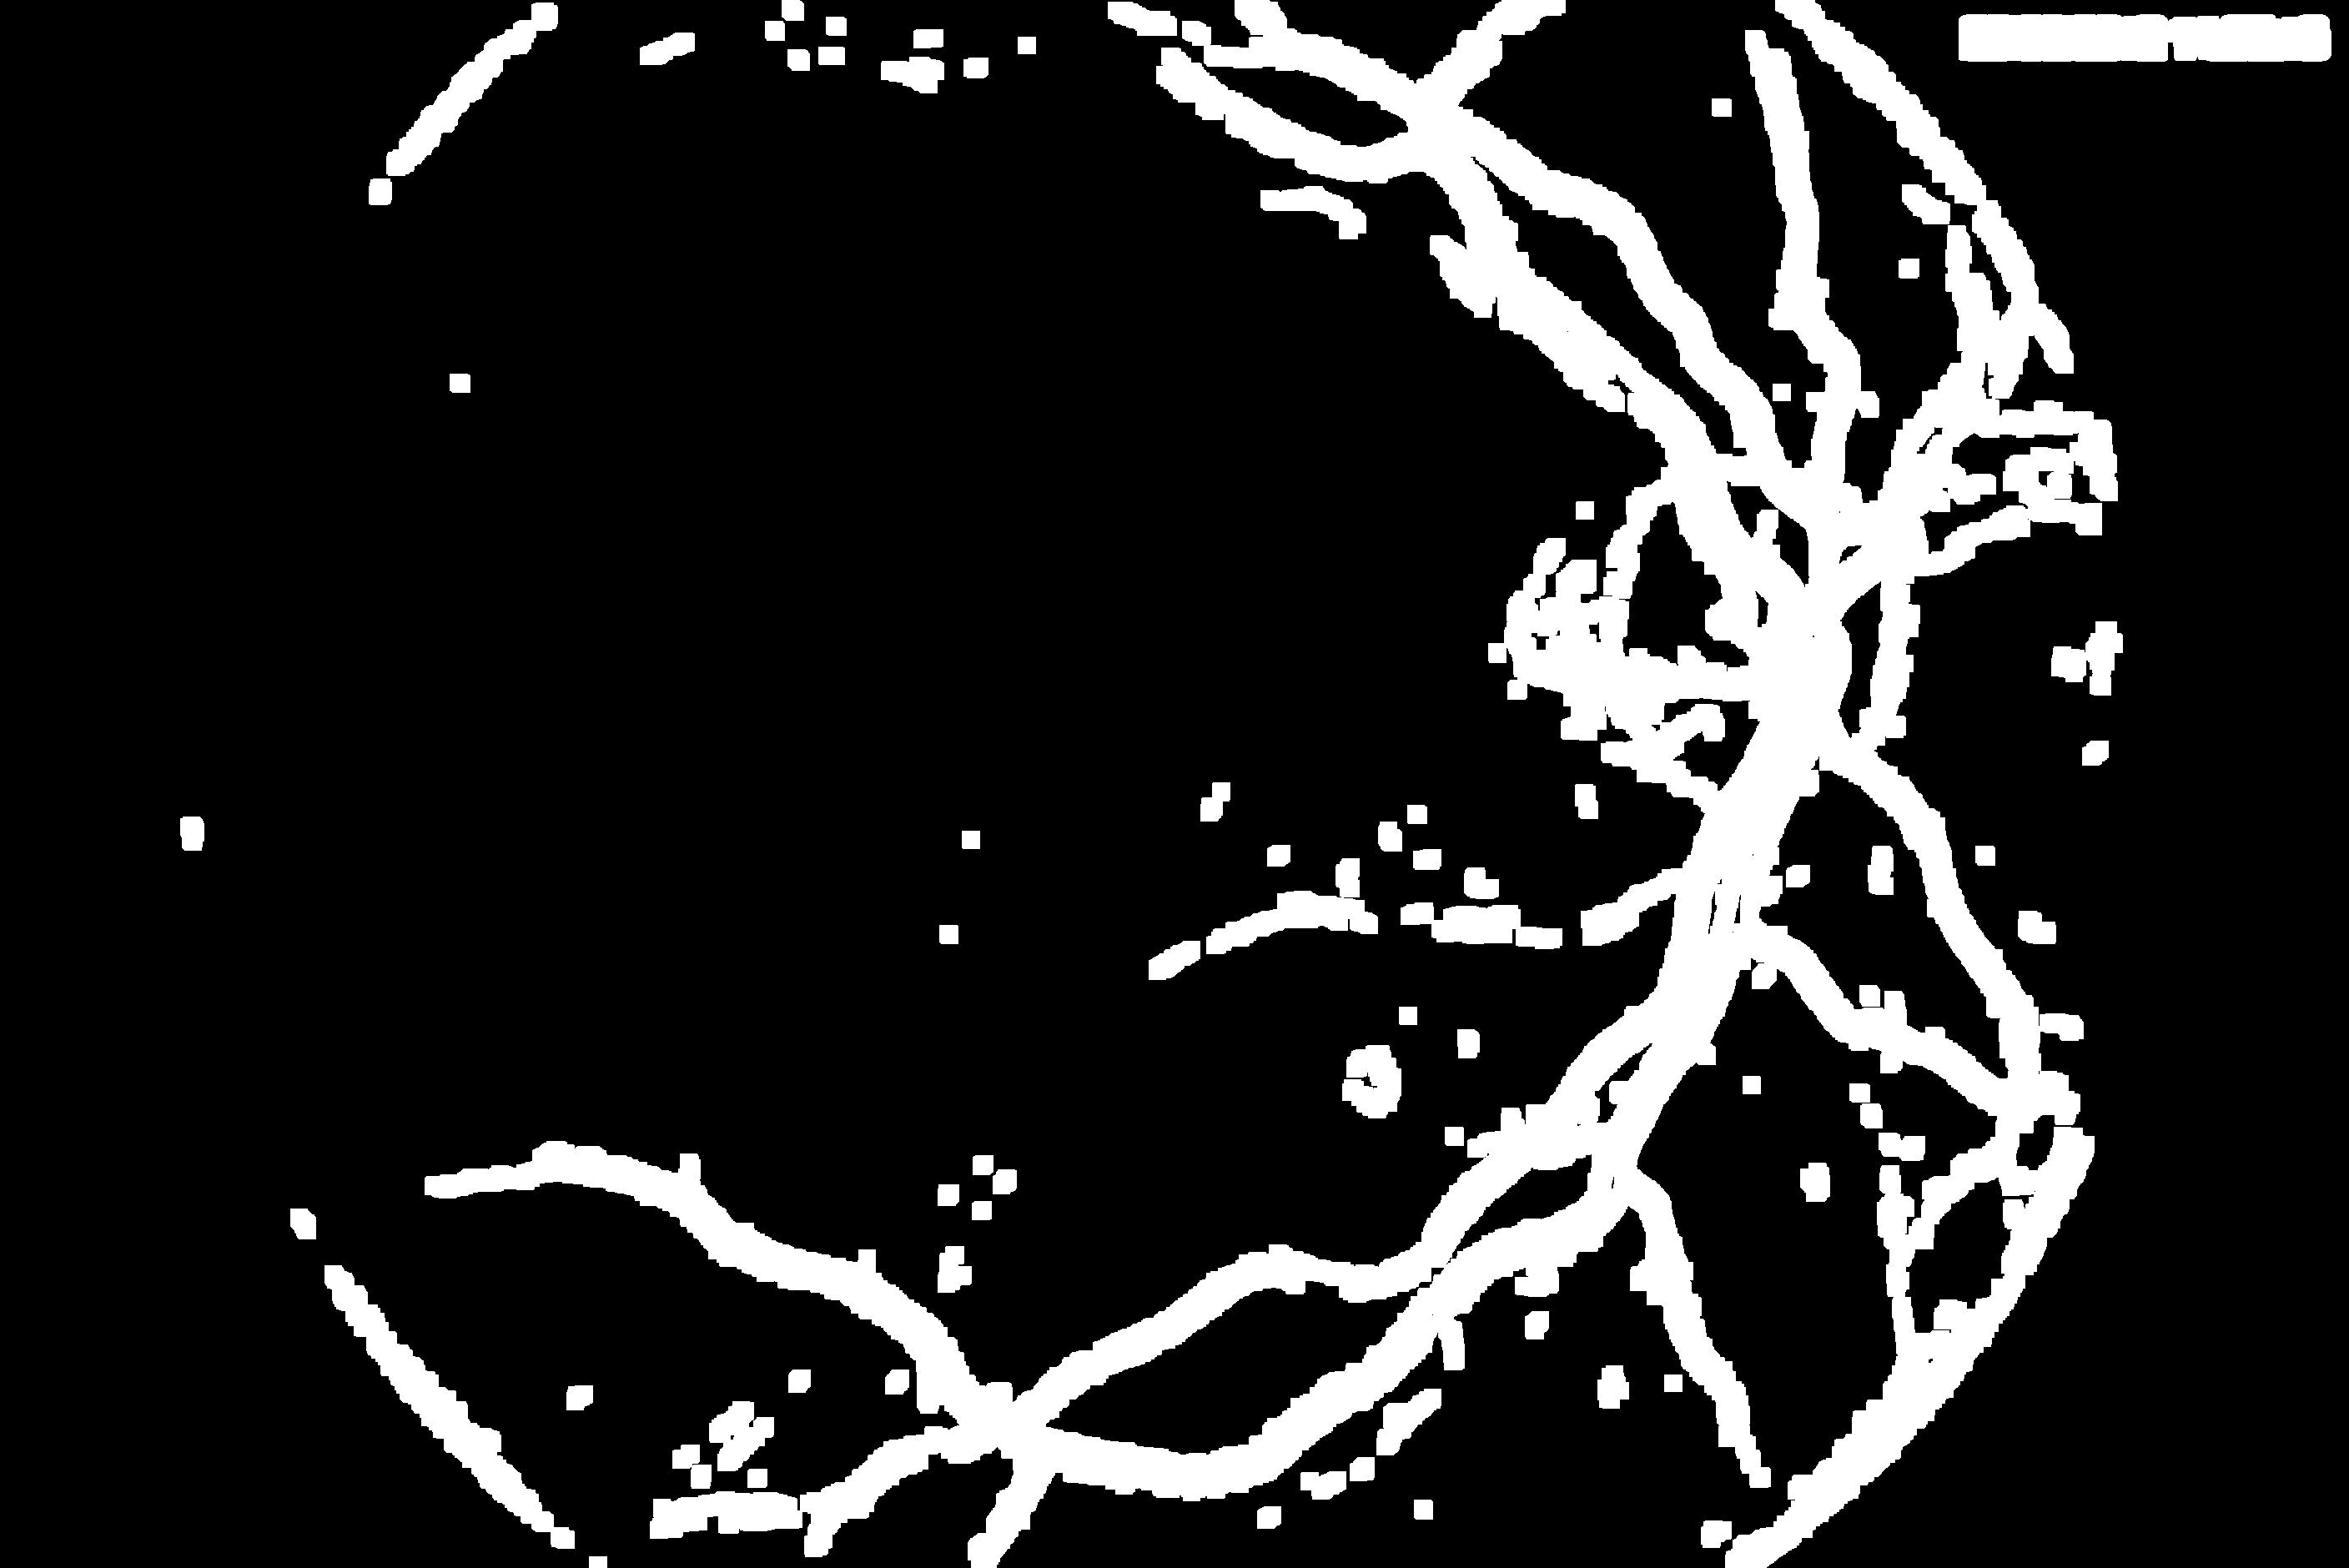

In [43]:
kernel1 = np.ones((5, 5), np.uint8)
dilation1 = cv2.dilate(edge, kernel1, iterations=5)
cv2_imshow(dilation1)

**EROSION**

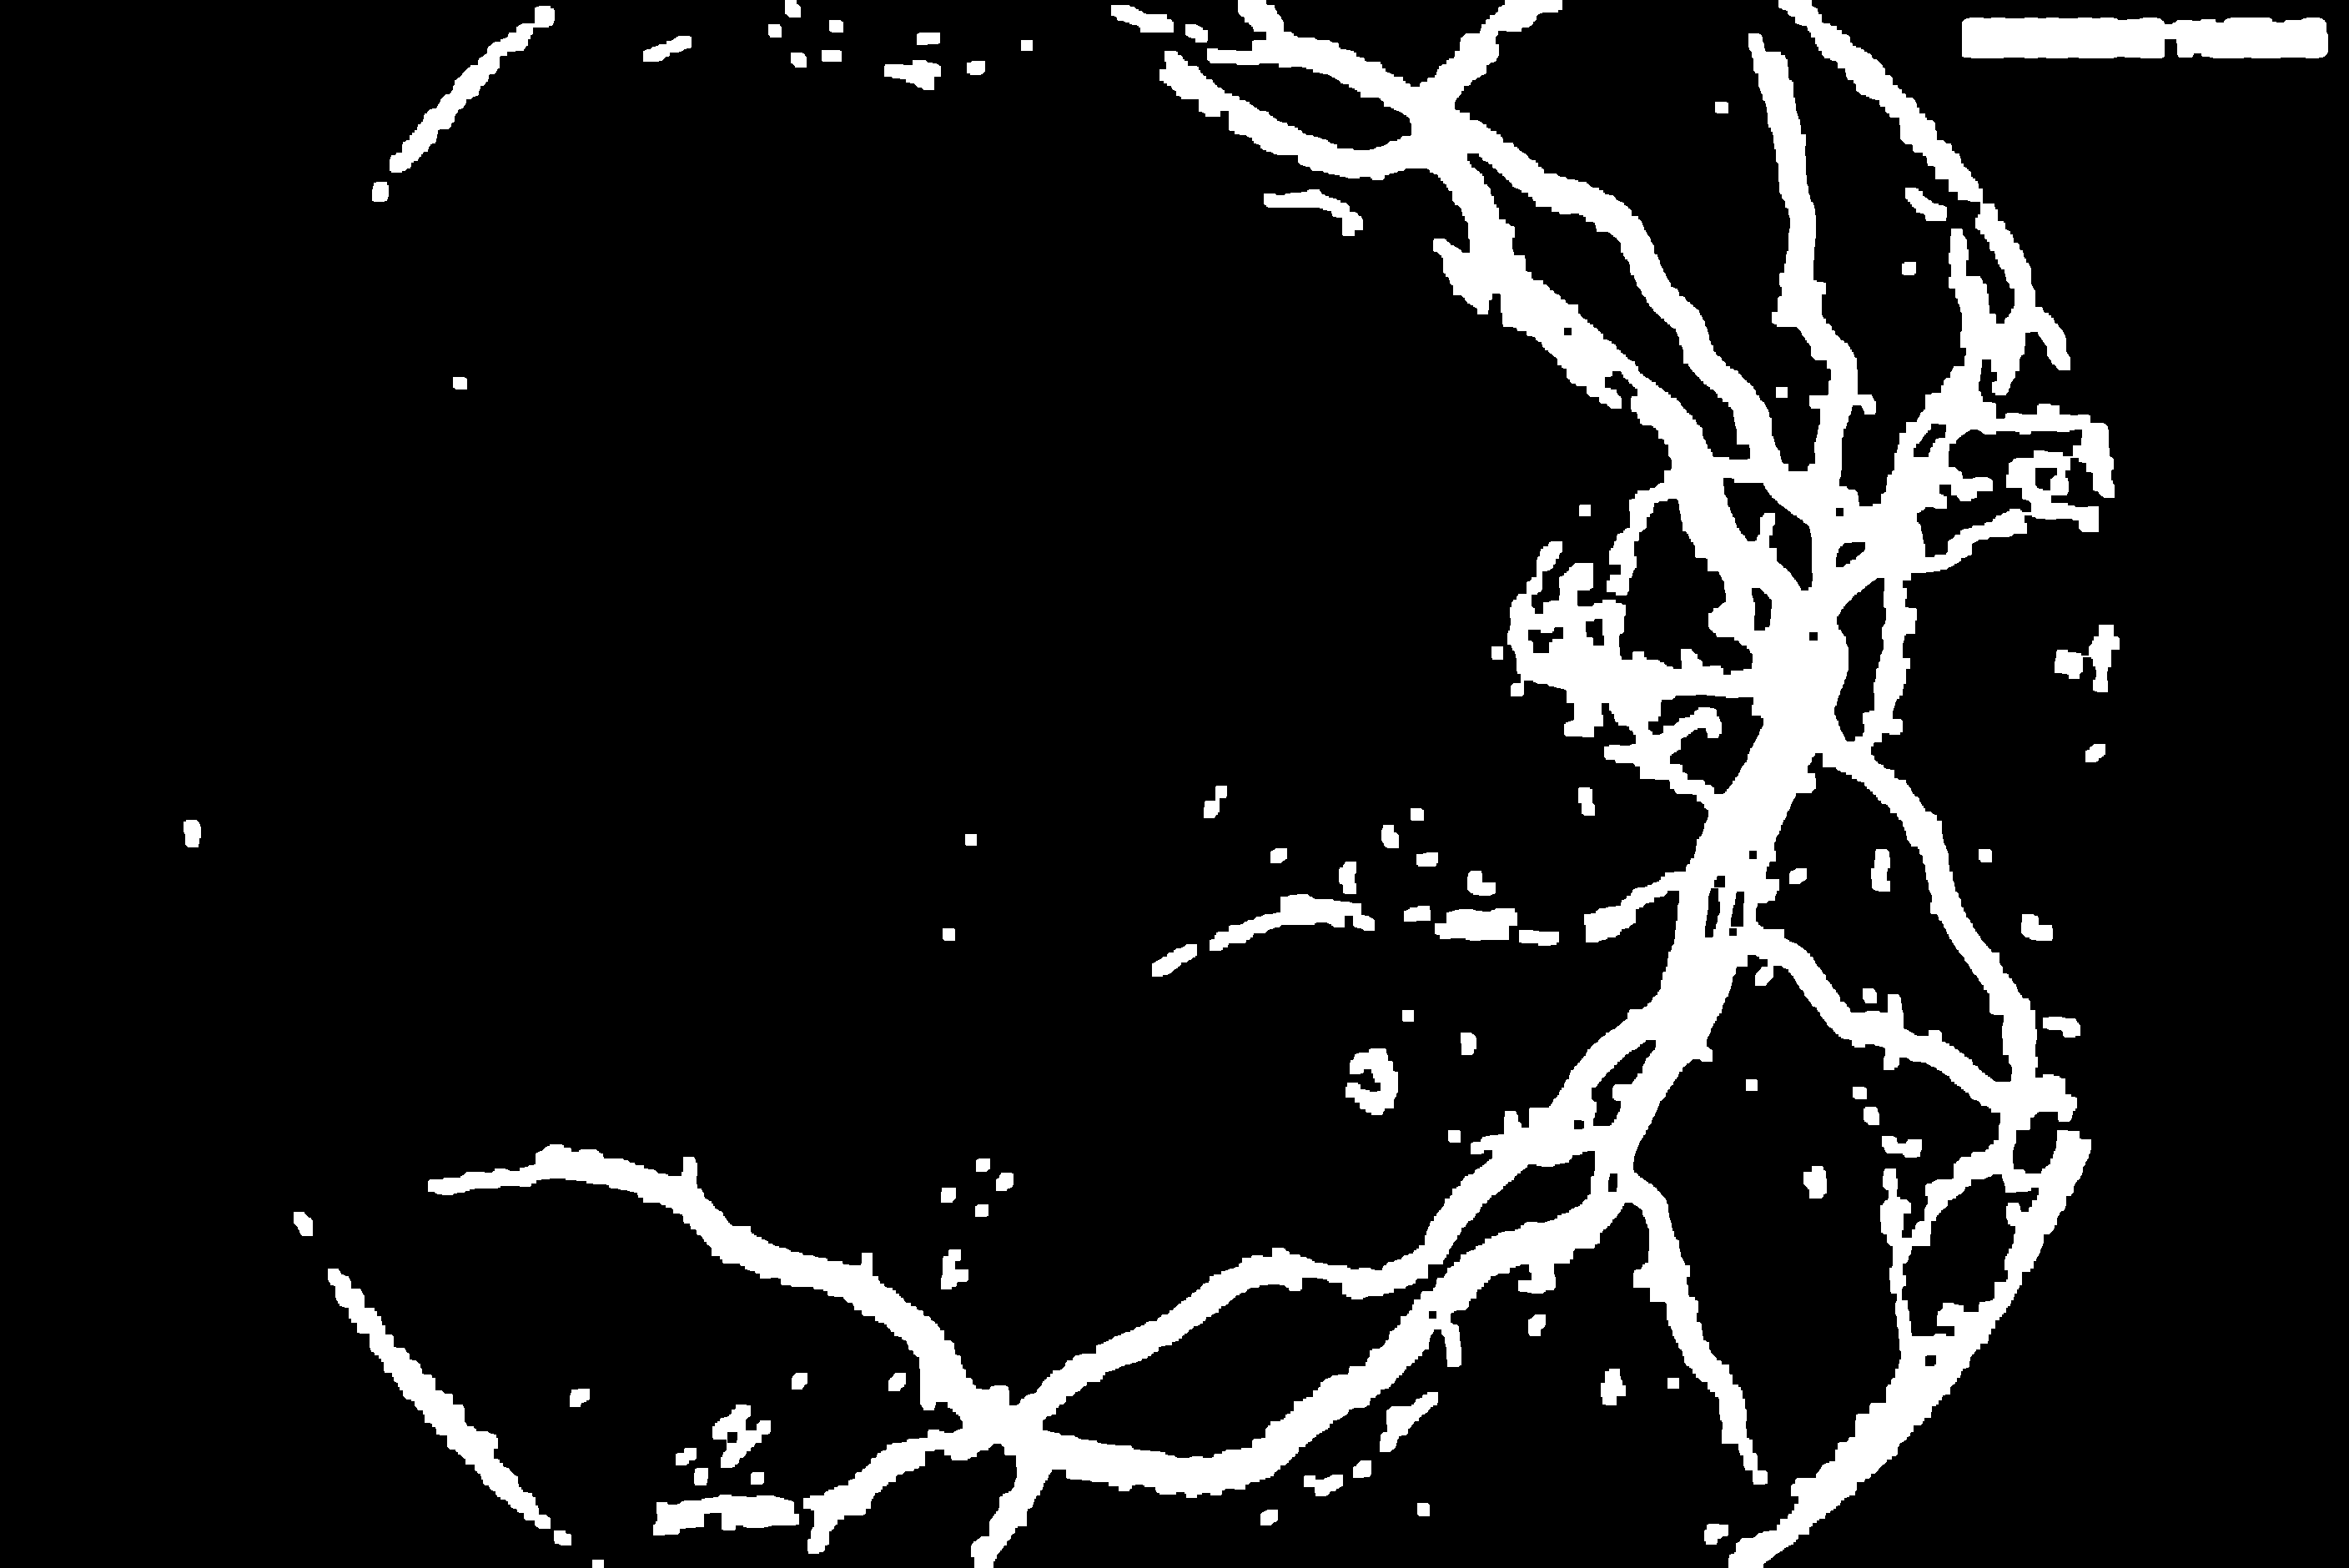

In [46]:
kernel3 = np.ones((3, 3), np.uint8)
erosion1 = cv2.erode(dilation1, kernel3, iterations=4)
cv2_imshow(erosion1)